## IMDB /TMDB Notebook


In this notebook, we will use data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers to gain insight on how the new Microsoft Movie studio should proceed in content creation to maximize ratings, reviews, and profit. The data we are using is important and helpful to this case because the information within the data can help us narrow down which genres of movies were well received and yielded higher ratings and grossed higher earnings.

So it looks like we need to join/merge the different tables so we can get the names/ratings/reviews etc matching

ratings with titles on tconstant

once we have the titles we can join the other sets that have the movie names

## business understanding top top explaining the goal and identify questions

diff sections
explain where the data comes from/source
prep explain cleaning
analysis/understanding - recs
conclusion section tying it back in to general overview/main question


In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
!ls

ev_imdb_tmdb_notebook.ipynb
project_notebook_ajc.ipynb


## Importing Data

Eyeballing the data sets to see how many data points we have, what we need to change, and how we can merge the sets together to get a better understanding of our data.

In this set, we have the average ratings for 73,856 and the number of votes for movies/'tconst'.

In [14]:
imdb_ratings = pd.read_csv('../zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
imdb_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In this data set, we have the name of different employees in the industry and their profession and what titles they're known for. Unsure of how we can use the birth and death years. Will probably drop those two

In [16]:
imdb_name_basics = pd.read_csv('../zippeddata/imdb.name.basics.csv.gz')
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In this data set, we have those same employees on 'nconst' with a more defined category of their position on each movie title 'tconst'. This set seems more useful to define what movies a certain person worked on to see the successs of a movie in relation to the artist.

In [17]:
imdb_principals = pd.read_csv('../zippeddata/imdb.title.principals.csv.gz')
imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


This dataset has the names of the movies in relation to the title_id/'tconst'. We can use the 'title_id' renamed as 'tconst' to merge the sets together.

In [18]:
imdb_akas = pd.read_csv('../zippeddata/imdb.title.akas.csv.gz')
imdb_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [19]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)
imdb_akas

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


This dataset has the directors and writers associated with each movie.

In [20]:
imdb_crew = pd.read_csv('../zippedData/imdb.title.crew.csv.gz')
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


This data set has genre_ids as integers. We should try to find the associating genre with the ID. It also shows the popularity, releae date, average, and vote count for different movies.

In [21]:
tmdb_movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies = tmdb_movies.drop('id', axis=1)
tmdb_movies

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## Merging IMDB Ratings Dataset with IMDB Titles

Here we are merging the IMDB name/titles set with the ratings.

In [22]:
imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [23]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
imdb_df = pd.merge(imdb_akas, imdb_ratings, on='tconst', how='left')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331703 entries, 0 to 331702
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
 8   averagerating      261806 non-null  float64
 9   numvotes           261806 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 27.8+ MB


## Filtering out duplicated/foreign names


Below we can see we have multiple names for a single move as it was released in several different markets. We want to isolate and get a single movie title we're familiar with and use that one. We made the decision to subset the US region to get a standard US release title. We filtered out all the different types of release titles as well.

In [25]:
imdb_df

,tconst,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,7.0,539338.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,7.0,539338.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,7.0,539338.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,7.0,539338.0
...,...,...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0,7.7,6.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,7.7,6.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0,NaN,NaN
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0,NaN,NaN


As you can see below, some tconst's have multiple listings for the same unique movie ID

In [26]:
imdb_df['tconst'].value_counts()

tt2488496    61
tt2310332    55
tt1201607    55
tt1790809    53
tt2278871    53
             ..
tt4627226     1
tt3677098     1
tt7040270     1
tt2217762     1
tt6483106     1
Name: tconst, Length: 122302, dtype: int64

We sort the set descending by the average rating to get the higher rating of the movie for each 'tconst'

In [27]:
imdb_df = imdb_df.sort_values(by='averagerating', ascending=False)

Here we are subsetting the US region.

In [28]:
imdb_df = imdb_df[imdb_df['region'] == 'US']

Here we can see that there's different titles for a single movie so we can filter these extra ones out

In [33]:
imdb_df['attributes'].value_counts()

new title                               532
informal English title                  209
literal English title                   180
complete title                          173
original script title                   127
DVD box title                            71
reissue title                            57
cable TV title                           49
segment title                            45
pre-release title                        45
informal literal English title           30
alternative transliteration              23
closing credits title                    20
theatrical title                         17
dubbed version                           15
subtitle                                 14
YIVO translation                         11
promotional abbreviation                 11
copyright title                          10
original subtitled version               10
series title                              9
recut version                             8
bootleg title                   

In [35]:
imdb_df['types'].value_counts()

imdbDisplay    3203
dvd             233
festival        218
tv               33
video            25
original          3
Name: types, dtype: int64

In [66]:
imdb_df = imdb_df[imdb_df['attributes'] != 'fake working title']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal short title']
imdb_df = imdb_df[imdb_df['attributes'] != 'promotional title']
imdb_df = imdb_df[imdb_df['types'] != 'working']
imdb_df = imdb_df[imdb_df['attributes'] != 'IMAX version']
imdb_df = imdb_df[imdb_df['attributes'] != 'poster title']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal title']
imdb_df = imdb_df[imdb_df['attributes'] != '3-D version']
imdb_df = imdb_df[imdb_df['attributes'] != 'director\'s cut']
imdb_df = imdb_df[imdb_df['attributes'] != 'alternative spelling']
imdb_df = imdb_df[imdb_df['attributes'] != 'informal alternative title']
imdb_df = imdb_df[imdb_df['attributes'] != 'long title']
imdb_df = imdb_df[imdb_df['attributes'] != 'short title']
imdb_df = imdb_df[imdb_df['types'] != 'alternative']

In [67]:
imdb_df = imdb_df.sort_values(by='numvotes', ascending=False)
imdb_df

,tconst,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
8298,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0
8270,tt1375666,24,Inception,US,NaN,imdbDisplay,NaN,0.0,8.8,1841066.0
13595,tt0816692,14,Interstellar,US,NaN,NaN,NaN,0.0,8.6,1299334.0
13612,tt0816692,2,Interstellar,US,en,NaN,NaN,0.0,8.6,1299334.0
47379,tt1853728,11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0,8.4,1211405.0
...,...,...,...,...,...,...,...,...,...,...
331539,tt7385718,1,Conway Pride,US,NaN,NaN,NaN,0.0,NaN,NaN
331574,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN
331582,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN


In [146]:
imdb_df.iloc[100:150]

,tconst,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
162484,tt4154796,18,Avengers: Endgame,US,en,NaN,NaN,0.0,8.8,441135
61129,tt2310332,49,The Hobbit: The Battle of the Five Armies,US,NaN,imdbDisplay,NaN,0.0,7.4,438621
33829,tt1570728,22,"Crazy, Stupid, Love.",US,NaN,NaN,NaN,0.0,7.4,436830
191396,tt3783958,41,La La Land,US,NaN,imdbDisplay,NaN,0.0,8.0,436070
94347,tt3460252,25,The Hateful Eight,US,NaN,imdbDisplay,NaN,0.0,7.8,434966
480,tt1343092,13,The Great Gatsby,US,NaN,imdbDisplay,NaN,0.0,7.3,433165
59893,tt1411697,16,The Hangover Part II,US,NaN,imdbDisplay,NaN,0.0,6.5,432800
80772,tt1229238,38,Mission: Impossible - Ghost Protocol,US,NaN,NaN,NaN,0.0,7.4,428142
51786,tt2250912,6,Spider-Man: Homecoming,US,NaN,NaN,NaN,0.0,7.5,426302
16792,tt0470752,11,Ex Machina,US,NaN,imdbDisplay,NaN,0.0,7.7,424542


In [68]:
imdb_df = imdb_df.drop_duplicates(subset=['tconst'], keep='first')
imdb_df

,tconst,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
8298,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0
13595,tt0816692,14,Interstellar,US,NaN,NaN,NaN,0.0,8.6,1299334.0
47379,tt1853728,11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0,8.4,1211405.0
81128,tt0848228,39,Marvel's The Avengers,US,NaN,NaN,complete title,0.0,8.1,1183655.0
94472,tt0993846,12,The Wolf of Wall Street,US,NaN,imdbDisplay,NaN,0.0,8.2,1035358.0
...,...,...,...,...,...,...,...,...,...,...
331539,tt7385718,1,Conway Pride,US,NaN,NaN,NaN,0.0,NaN,NaN
331574,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN
331582,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN


Below we can see we only have 1 'tconst' now for each  movie

In [70]:
imdb_df['tconst'].value_counts()

tt3157318    1
tt2171827    1
tt1807057    1
tt6722142    1
tt3038850    1
            ..
tt1733686    1
tt7236866    1
tt0999913    1
tt7033498    1
tt2098832    1
Name: tconst, Length: 46709, dtype: int64

Below we can see we have multiple titles still but they can be different movies with the same title.

In [69]:
imdb_df['title'].value_counts()

Broken                                   9
The Return                               9
Gone                                     9
Home                                     7
Collision                                7
                                        ..
The Globe as a Graph                     1
Clint Lowery: The Sound and the Story    1
Lambent Fuse                             1
Obsessed: The Split                      1
Reins of Hope Movie                      1
Name: title, Length: 44633, dtype: int64

## Merging the Movies Database to our IMDB dataframe on Title

Here we merged the two different datasets to get the other information to match in the table

In [36]:
tmdb_movies

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [37]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   original_language  26517 non-null  object 
 2   original_title     26517 non-null  object 
 3   popularity         26517 non-null  float64
 4   release_date       26517 non-null  object 
 5   title              26517 non-null  object 
 6   vote_average       26517 non-null  float64
 7   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [38]:
tmdb_movies_sorted = tmdb_movies['title'] == tmdb_movies['original_title']
tmdb_movies_sorted.value_counts()

True     23973
False     2544
dtype: int64

Below, we can see the titles are mismatched on original_title having generally the international title and the title column having the English title.

In [43]:
tmdb_movies_not_equal = tmdb_movies[tmdb_movies['title'] != tmdb_movies['original_title']]
tmdb_movies_not_equal[:60]

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14,"[27, 80]",en,Saw 3D,20.370,2010-10-28,Saw: The Final Chapter,6.0,1488
49,"[10749, 18]",es,Tres metros sobre el cielo,13.721,2010-12-20,Three Steps Above Heaven,7.5,960
67,"[16, 12, 14, 10751]",en,Arthur 3: la guerre des deux mondes,12.679,2010-08-22,Arthur 3: The War of the Two Worlds,5.6,865
70,"[80, 18, 9648, 10749]",es,El secreto de sus ojos,12.531,2010-04-16,The Secret in Their Eyes,7.9,1141
75,[16],ja,サマーウォーズ,12.275,2010-10-13,Summer Wars,7.5,447
79,"[28, 53, 80, 9648]",sv,Luftslottet som sprängdes,12.235,2010-10-29,The Girl Who Kicked the Hornet's Nest,7.0,705
84,"[12, 14, 16, 878]",ja,ゲド戦記,12.005,2010-08-13,Tales from Earthsea,6.6,502
87,"[18, 28, 53, 80, 9648]",sv,Flickan som lekte med elden,11.655,2010-07-09,The Girl Who Played with Fire,7.0,881
98,"[14, 12, 28, 9648]",fr,Les Aventures extraordinaires d'Adèle Blanc-Sec,11.221,2010-04-14,The Extraordinary Adventures of Adèle Blanc-Sec,6.0,671
103,"[28, 18, 36]",ja,乱,10.885,1985-09-26,Ran,8.1,600


In [50]:
tmdb_movies
print(f'tmbd_movies has {len(tmdb_movies)} records')

tmbd_movies has 26517 records


In [51]:
print(f'imdb_df has {len(imdb_df)} records')

imdb_df has 47807 records


In [55]:
imdb_tmdb = pd.merge(imdb_df, tmdb_movies, on='title', how='left')
imdb_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49926 entries, 0 to 49925
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             49926 non-null  object 
 1   ordering           49926 non-null  int64  
 2   title              49926 non-null  object 
 3   region             49926 non-null  object 
 4   language           475 non-null    object 
 5   types              4048 non-null   object 
 6   attributes         1809 non-null   object 
 7   is_original_title  49921 non-null  float64
 8   averagerating      28792 non-null  float64
 9   numvotes           28792 non-null  float64
 10  genre_ids          14420 non-null  object 
 11  original_language  14420 non-null  object 
 12  original_title     14420 non-null  object 
 13  popularity         14420 non-null  float64
 14  release_date       14420 non-null  object 
 15  vote_average       14420 non-null  float64
 16  vote_count         144

In [56]:
print(f'those two merged have {len(imdb_tmdb)} records')

those two merged have 49926 records


** see what data was lost and try to find pattern in what was lost

In [57]:
imdb_df['title'].value_counts()[:50]

Gone                     10
The Return                9
Broken                    9
Lucky                     7
Home                      7
Collision                 7
Stuck                     6
Closure                   6
Revenge                   6
Dead End                  6
Love                      6
Homecoming                6
The Other Side            6
Aftermath                 6
Freedom                   6
Vengeance                 6
Writer's Block            6
Trapped                   5
Paradise                  5
Transit                   5
The Family                5
Happy                     5
I Am                      5
Unfinished Business       5
Redemption                5
Breaking Point            5
The Truth                 5
Last Night                5
The List                  5
Retribution               5
Thieves                   5
The Harvest               5
Recovery                  5
Lights Out                5
Catalyst                  5
The System          

## Dropping Duplicates

In [131]:
imdb_df = imdb_df.drop_duplicates(subset=['tconst'], keep='first')

In [132]:
imdb_df['title'].value_counts()[:50]

The Return        6
Dead End          6
Lucky             6
Aftermath         5
Stuck             5
Homecoming        5
Broken            5
Refuge            4
Writer's Block    4
Closure           4
The Other Side    4
Lights Out        4
Paradise          4
Bully             4
The Family        4
Delirium          4
Love              4
Escape Room       3
Noah              3
Truth or Dare     3
Redemption        3
Fake              3
Truth             3
Trapped           3
Do Not Disturb    3
Another World     3
Shelter           3
Bigfoot           3
Opening Night     3
Home              3
Finding Home      3
Get a Job         3
Frankenstein      3
Bastard           3
Collapse          3
After             3
The Stray         3
The Throwaways    3
Abduction         3
Recovery          3
Blue              3
The Girl          3
Turning Point     3
Wild              3
Rio               3
The Pact          3
The Price         3
Anna              3
Misfire           3
The Basement      3


In [42]:
imdb_df = imdb_df.drop_duplicates(subset=['title'], keep='first')

In [77]:
imdb_df.keys()

Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title', 'averagerating', 'numvotes',
       'genre_ids', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'lucky'],
      dtype='object')

In [76]:
imdb_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26050 entries, 0 to 27772
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             26050 non-null  object 
 1   ordering           26050 non-null  int64  
 2   title              26050 non-null  object 
 3   region             26050 non-null  object 
 4   language           279 non-null    object 
 5   types              3209 non-null   object 
 6   attributes         1200 non-null   object 
 7   is_original_title  26050 non-null  float64
 8   averagerating      26050 non-null  float64
 9   numvotes           26050 non-null  int64  
 10  genre_ids          10996 non-null  object 
 11  original_language  10996 non-null  object 
 12  original_title     10996 non-null  object 
 13  popularity         10996 non-null  float64
 14  release_date       10996 non-null  object 
 15  vote_average       10996 non-null  float64
 16  vote_count         109

## Dropping extra columns

In [20]:
imdb_df = imdb_df.drop(['original_title_y', 'attributes', 'types'], axis=1)

In [21]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16392 entries, 0 to 16391
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               16392 non-null  object 
 1   averagerating        16392 non-null  float64
 2   numvotes             16392 non-null  int64  
 3   ordering             16392 non-null  int64  
 4   title                16392 non-null  object 
 5   region               12911 non-null  object 
 6   language             978 non-null    object 
 7   is_original_title    16392 non-null  float64
 8   genre_ids_x          16392 non-null  object 
 9   original_language_x  16392 non-null  object 
 10  original_title_x     16392 non-null  object 
 11  popularity_x         16392 non-null  float64
 12  release_date_x       16392 non-null  object 
 13  vote_average_x       16392 non-null  float64
 14  vote_count_x         16392 non-null  int64  
 15  genre_ids_y          16392 non-null 

In [22]:
imdb_df = imdb_df.drop('language', axis=1)
imdb_df

,tconst,averagerating,numvotes,ordering,title,region,is_original_title,genre_ids_x,original_language_x,original_title_x,popularity_x,release_date_x,vote_average_x,vote_count_x,genre_ids_y,original_language_y,popularity_y,release_date_y,vote_average_y,vote_count_y
0,tt1043726,4.2,50352,10,The Legend of Hercules,NaN,1.0,"[28, 12]",en,The Legend of Hercules,13.754,2014-01-10,4.5,805,"[28, 12]",en,13.754,2014-01-10,4.5,805
1,tt1270291,5.8,5728,10,Hunter Prey,NaN,1.0,"[878, 53]",en,Hunter Prey,3.738,2010-05-01,5.6,51,"[878, 53]",en,3.738,2010-05-01,5.6,51
2,tt1283887,5.4,2527,1,Burning Palms,NaN,1.0,"[35, 18, 10751]",en,Burning Palms,2.883,2010-04-23,5.6,27,"[35, 18, 10751]",en,2.883,2010-04-23,5.6,27
3,tt1285219,3.4,387,1,Ghosts Don't Exist,US,0.0,"[27, 53]",en,Ghosts Don't Exist,1.703,2010-01-01,4.1,5,"[27, 53]",en,1.703,2010-01-01,4.1,5
4,tt1343110,2.5,345,1,Speed-Dating,US,0.0,"[35, 18, 10749, 53]",en,Speed-Dating,1.400,2010-01-01,3.1,6,"[35, 18, 10749, 53]",en,1.400,2010-01-01,3.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16387,tt8439854,6.6,7691,1,Lust Stories,IN,0.0,"[18, 10749]",hi,Lust Stories,7.811,2018-06-15,6.6,46,"[18, 10749]",hi,7.811,2018-06-15,6.6,46
16388,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,[],en,Death of a Nation,0.600,2010-06-27,6.5,1,[],en,0.600,2010-06-27,6.5,1
16389,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,[],en,Death of a Nation,0.600,2010-06-27,6.5,1,"[99, 36]",en,2.254,2018-08-03,5.5,12
16390,tt8564902,4.7,5863,1,Death of a Nation,US,0.0,"[99, 36]",en,Death of a Nation,2.254,2018-08-03,5.5,12,[],en,0.600,2010-06-27,6.5,1


In [23]:
imdb_df.describe()

,averagerating,numvotes,ordering,is_original_title,popularity_x,vote_average_x,vote_count_x,popularity_y,vote_average_y,vote_count_y
count,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000,16392.000000
mean,5.921822,4753.583638,1.693997,0.198939,2.932109,5.768631,166.149036,2.932109,5.768631,166.149036
std,1.444242,31203.935488,2.400978,0.399214,3.989803,1.812935,864.093307,3.989803,1.812935,864.093307
min,1.100000,5.000000,1.000000,0.000000,0.600000,0.000000,1.000000,0.600000,0.000000,1.000000
25%,4.900000,40.000000,1.000000,0.000000,0.600000,4.800000,2.000000,0.600000,4.800000,2.000000
50%,6.100000,169.000000,1.000000,0.000000,1.307000,5.900000,5.000000,1.307000,5.900000,5.000000
75%,7.000000,657.000000,1.000000,0.000000,3.427000,7.000000,26.000000,3.427000,7.000000,26.000000
max,9.700000,820847.000000,10.000000,1.000000,80.773000,10.000000,20175.000000,80.773000,10.000000,20175.000000


In [24]:
imdb_df['is_original_title'].value_counts()

0.0    13131
1.0     3261
Name: is_original_title, dtype: int64

In [25]:
imdb_df['numvotes'].mean()

4753.583638360175

## Initial Exploration of Correlations and Visualizations

In [71]:
imdb_df.corr()

,ordering,is_original_title,averagerating,numvotes
ordering,1.000000,NaN,-0.028383,0.519107
is_original_title,NaN,NaN,NaN,NaN
averagerating,-0.028383,NaN,1.000000,0.071419
numvotes,0.519107,NaN,0.071419,1.000000


In [72]:
imdb_df

,tconst,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
8298,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0
13595,tt0816692,14,Interstellar,US,NaN,NaN,NaN,0.0,8.6,1299334.0
47379,tt1853728,11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0,8.4,1211405.0
81128,tt0848228,39,Marvel's The Avengers,US,NaN,NaN,complete title,0.0,8.1,1183655.0
94472,tt0993846,12,The Wolf of Wall Street,US,NaN,imdbDisplay,NaN,0.0,8.2,1035358.0
...,...,...,...,...,...,...,...,...,...,...
331539,tt7385718,1,Conway Pride,US,NaN,NaN,NaN,0.0,NaN,NaN
331574,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN
331582,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN


Filtering to get ratings greater than zero and number of votes from movies with more than at least the mean count of votes

In [73]:
imdb_df['numvotes'].mean()

8133.966065259117

In [81]:
imdb_df_avg_num = imdb_df[imdb_df['averagerating'] > 0]
imdb_df_avg_num = imdb_df[imdb_df['numvotes'] >= imdb_df['numvotes'].mean()]

In [83]:
imdb_df_avg_num.corr()

,ordering,is_original_title,averagerating,numvotes
ordering,1.000000,NaN,0.107818,0.337810
is_original_title,NaN,NaN,NaN,NaN
averagerating,0.107818,NaN,1.000000,0.369993
numvotes,0.337810,NaN,0.369993,1.000000


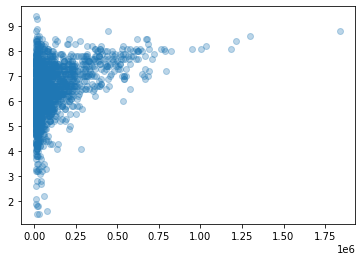

In [86]:
fig, ax = plt.subplots()
ax.scatter(imdb_df_avg_num['numvotes'], imdb_df_avg_num['averagerating'],  alpha=.3)


Here we are exploring the correlation between vote average, vote count, and popularity

In [89]:
tmdb_movies.corr()

,popularity,vote_average,vote_count
popularity,1.000000,0.065273,0.694849
vote_average,0.065273,1.000000,0.086370
vote_count,0.694849,0.086370,1.000000


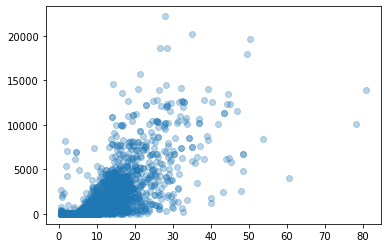

In [88]:
fig, ax = plt.subplots()
ax.scatter(tmdb_movies['popularity'], tmdb_movies['vote_count'], alpha=.3)

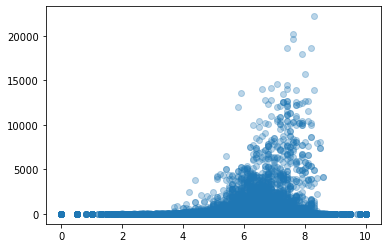

In [90]:
fig, ax = plt.subplots()
ax.scatter(tmdb_movies['vote_average'], tmdb_movies['vote_count'], alpha=.3)

## Combining Names and Job to IMDB to get Correlation Between Certain Names and Ratings

In [91]:
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [92]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [93]:
imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [169]:
people_df = pd.merge(imdb_principals, imdb_name_basics, on='nconst', how='inner')
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,NaN,NaN,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [170]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027912 entries, 0 to 1027911
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tconst              1027912 non-null  object 
 1   ordering            1027912 non-null  int64  
 2   nconst              1027912 non-null  object 
 3   category            1027912 non-null  object 
 4   job                 177684 non-null   object 
 5   characters          393171 non-null   object 
 6   primary_name        1027912 non-null  object 
 7   birth_year          234048 non-null   float64
 8   death_year          11843 non-null    float64
 9   primary_profession  974266 non-null   object 
 10  known_for_titles    997445 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 94.1+ MB


Below we dropped birth_year and death_year as we aren't exploring that relation. We then dropped characters, jobs, and primary_profession because category defines the job already and has a full amount of information for the set.

In [171]:
people_df.drop('birth_year', axis=1, inplace=True)
people_df.drop('death_year', axis=1, inplace=True)

In [172]:
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [173]:
people_df.drop('job', axis=1, inplace=True)
people_df.drop('characters', axis=1, inplace=True)
people_df.drop('primary_profession', axis=1, inplace=True)

In [174]:
people_df

,tconst,ordering,nconst,category,primary_name,known_for_titles
0,tt0111414,1,nm0246005,actor,Tommy Dysart,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,Frank Howson,"tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,Frank Howson,"tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,Barry Porter-Robinson,"tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,Sean Barton,"tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,Phillippe Warner,NaN
1027908,tt9689618,5,nm10439725,director,Xavi Herrero,tt9689618
1027909,tt9692684,3,nm10441594,director,Guy Jones,NaN
1027910,tt9692684,4,nm6009913,writer,Sabrina Mahfouz,"tt5191128,tt3254170,tt2319282,tt8452302"


In [175]:
imdb_df_people_df = pd.merge(imdb_df, people_df, on='tconst', how='left')
imdb_df_people_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,known_for_titles
0,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,7.0,nm0001877,composer,Hans Zimmer,"tt0172495,tt0988045,tt5013056,tt1375666"
1,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,4.0,nm0913822,actor,Ken Watanabe,"tt0831387,tt1375666,tt2109248,tt0325710"
2,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,8.0,nm0002892,cinematographer,Wally Pfister,"tt1375666,tt0468569,tt0482571,tt0372784"
3,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,1.0,nm0000138,actor,Leonardo DiCaprio,"tt0407887,tt0120338,tt0993846,tt1375666"
4,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,3.0,nm0680983,actress,Ellen Page,"tt0424136,tt1375666,tt0467406,tt1877832"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345163,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN,6.0,nm1082058,writer,Nenad Pata,"tt0082998,tt0084823,tt9705860"
345164,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN,8.0,nm3812204,cinematographer,Jakov Lerotic,"tt1604944,tt9705860,tt5466214,tt4654908"
345165,tt9755806,1,Big Shark,US,NaN,NaN,NaN,0.0,NaN,NaN,3.0,nm2427684,actor,Isaiah LaBorde,"tt4441098,tt4351548"
345166,tt9755806,1,Big Shark,US,NaN,NaN,NaN,0.0,NaN,NaN,2.0,nm0802995,actor,Greg Sestero,"tt6155194,tt3521126,tt0368226,tt0189047"


## exploring category of each job type to see what names have average ratings

In [103]:
imdb_df_people_df['category'].value_counts()

actor                  87172
actress                49736
director               46089
producer               40894
self                   26482
composer               25239
cinematographer        24780
writer                 24047
editor                 15526
production_designer     3620
archive_footage         1284
archive_sound             10
Name: category, dtype: int64

## people category vs ratings

Using category director and producer to find relations against top ratings

In [120]:
producer_df = imdb_df_people_df[imdb_df_people_df['category'] == 'producer']
producer_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,primary_profession,known_for_titles
8,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,6.0,nm0858799,producer,Emma Thomas,"producer,miscellaneous,actress","tt0468569,tt1375666,tt5013056,tt0154506"
17,tt0816692,14,Interstellar,US,NaN,NaN,NaN,0.0,8.6,1299334.0,8.0,nm0858799,producer,Emma Thomas,"producer,miscellaneous,actress","tt0468569,tt1375666,tt5013056,tt0154506"
19,tt0816692,14,Interstellar,US,NaN,NaN,NaN,0.0,8.6,1299334.0,7.0,nm0643553,producer,Lynda Obst,"producer,writer","tt0092513,tt0133952,tt0118884,tt0816692"
24,tt1853728,11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0,8.4,1211405.0,8.0,nm0792049,producer,Stacey Sher,"producer,actress,executive","tt1853728,tt0119177,tt0259711,tt0195685"
28,tt1853728,11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0,8.4,1211405.0,6.0,nm0399737,producer,Reginald Hudlin,"producer,director,writer","tt1853728,tt5301662,tt0116707,tt0099800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345138,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN,7.0,nm3819444,producer,Ross Putman,"producer,talent_agent,writer","tt8855960,tt2274074,tt7385654,tt7645122"
345144,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN,6.0,nm9137077,producer,David Carrico,producer,"tt10092170,tt8855960,tt8861780,tt9861014"
345154,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN,6.0,nm3431611,producer,Jasmin Espada,"publicist,miscellaneous,producer","tt4200916,tt8765516,tt8901666,tt6782434"
345155,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN,7.0,nm1846167,producer,Michael Thornberry,"actor,producer,executive","tt8425272,tt8901666,tt8765516,tt0448157"


In [132]:
grouped_high_rating_producers = producer_df.sort_values(by='averagerating', ascending=False)
grouped_high_rating_producers

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,primary_profession,known_for_titles
225089,tt1770682,1,Freeing Bernie Baran,US,NaN,NaN,NaN,0.0,10.0,5.0,7.0,nm4167418,producer,Tom Opferman,"producer,cinematographer,editor","tt1770682,tt1051155,tt0368771"
225093,tt6991826,1,A Dedicated Life: Phoebe Brand and the Legacy ...,US,NaN,NaN,NaN,0.0,10.0,5.0,4.0,nm9004555,producer,Tim David Russell,"actor,producer","tt6996846,tt6909906,tt2402539,tt6982394"
216044,tt6271662,2,Belt,US,NaN,NaN,literal English title,0.0,9.8,6.0,6.0,nm7574932,producer,Stephanie Benamra,"producer,actress,editorial_department","tt5012400,tt5136576,tt5624438,tt10224912"
132636,tt8986906,1,RISE: The Story of Augustines,US,NaN,NaN,NaN,0.0,9.8,45.0,6.0,nm4784624,producer,Michael J. Baum,"sound_department,producer","tt0324924,tt7312296,tt8986906,tt2088493"
218692,tt4824256,3,Blackbear,US,en,NaN,NaN,0.0,9.7,6.0,8.0,nm1966555,producer,Gloria Stella,"producer,miscellaneous,actress","tt3745714,tt4824256,tt1742334,tt8477134"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345138,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN,7.0,nm3819444,producer,Ross Putman,"producer,talent_agent,writer","tt8855960,tt2274074,tt7385654,tt7645122"
345144,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN,6.0,nm9137077,producer,David Carrico,producer,"tt10092170,tt8855960,tt8861780,tt9861014"
345154,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN,6.0,nm3431611,producer,Jasmin Espada,"publicist,miscellaneous,producer","tt4200916,tt8765516,tt8901666,tt6782434"
345155,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN,7.0,nm1846167,producer,Michael Thornberry,"actor,producer,executive","tt8425272,tt8901666,tt8765516,tt0448157"


In [134]:
grouped_high_rating_producers_mean = grouped_high_rating_producers[grouped_high_rating_producers['numvotes'] >= grouped_high_rating_producers['numvotes'].mean()]
grouped_high_rating_producers_mean

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,primary_profession,known_for_titles
16289,tt5275892,1,O.J.: Made in America,US,NaN,NaN,NaN,0.0,8.9,14946.0,8.0,nm2309941,producer,Nina Krstic,"producer,cinematographer,director","tt2201488,tt5275892"
16290,tt5275892,1,O.J.: Made in America,US,NaN,NaN,NaN,0.0,8.9,14946.0,7.0,nm2101046,producer,Libby Geist,"producer,miscellaneous,production_manager","tt1408430,tt1908471,tt5275892,tt2158640"
16291,tt5275892,1,O.J.: Made in America,US,NaN,NaN,NaN,0.0,8.9,14946.0,9.0,nm2404324,producer,Erin Leyden,"producer,miscellaneous,director","tt5275892,tt2724194,tt1408430,tt3460320"
16293,tt5275892,1,O.J.: Made in America,US,NaN,NaN,NaN,0.0,8.9,14946.0,6.0,nm2973575,producer,Deirdre Fenton,"producer,miscellaneous,director","tt3460320,tt5275892,tt8955762,tt1408430"
16294,tt5275892,1,O.J.: Made in America,US,NaN,NaN,NaN,0.0,8.9,14946.0,10.0,nm2484804,producer,Tamara Rosenberg,"producer,director,camera_department","tt0795174,tt5275892,tt0396392,tt1863406"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,tt4458206,2,Code Name: K.O.Z.,US,NaN,imdbDisplay,NaN,0.0,1.5,26723.0,7.0,nm8325430,producer,Ugur Yalçinkaya,producer,tt4458206
12583,tt4458206,2,Code Name: K.O.Z.,US,NaN,imdbDisplay,NaN,0.0,1.5,26723.0,6.0,nm8325431,producer,Kazim Albayrak,producer,tt4458206
16642,tt4009460,4,Saving Christmas,US,NaN,NaN,NaN,0.0,1.5,14221.0,8.0,nm7469551,producer,David Shannon,"actor,producer,sound_department",tt4009460
16641,tt4009460,4,Saving Christmas,US,NaN,NaN,NaN,0.0,1.5,14221.0,7.0,nm6415169,producer,Ankara Rosser,"producer,actress","tt3566370,tt3070502,tt4009460"


In [147]:
grouped_high_rating_producers_mean['primary_name'].value_counts()

Jason Blum          35
Scott Rudin         22
Tim Bevan           19
Eric Fellner        17
Peter Chernin       16
                    ..
John P. Melfi        1
Ugur Yalçinkaya      1
Luis A. Riefkohl     1
Isen Robbins         1
Chady Eli Mattar     1
Name: primary_name, Length: 1877, dtype: int64

In [138]:
producer_mean_rating = grouped_high_rating_producers_mean.groupby('primary_name').mean()

In [167]:
producer_mean_rating[:20]

,ordering_x,is_original_title,averagerating,numvotes,ordering_y
primary_name,,,,,
Erin Leyden,1.000000,0.0,8.900000,1.494600e+04,9.000000
Tamara Rosenberg,1.000000,0.0,8.900000,1.494600e+04,10.000000
Deirdre Fenton,1.000000,0.0,8.900000,1.494600e+04,6.000000
Libby Geist,1.000000,0.0,8.900000,1.494600e+04,7.000000
Nina Krstic,1.000000,0.0,8.900000,1.494600e+04,8.000000
Lynda Obst,14.000000,0.0,8.600000,1.299334e+06,7.000000
Siddharth Roy Kapur,8.000000,0.0,8.500000,1.236380e+05,10.000000
Kalpathi S. Ganesh,5.000000,0.0,8.500000,1.374700e+04,9.000000
Nicolas Duval Adassovsky,21.000000,0.0,8.500000,6.773430e+05,8.000000


Upon further investigation to the top names, we concluded that we can suggest Lynda Obst to be a producer for a wide variety of films that return high ratings and Siddharth Roy Kapur in the international market for Bollywood films. We can recommend Erin Leyden, Tamara Rosenberg, Deirdre FEnton, Libby Geist, and Nina Krstic for social justice/commentary films.

In [143]:
producer_mean_rating.sort_values(by='averagerating', ascending=False, inplace=True)

In [149]:
producer_mean_rating.loc['Jason Blum']

ordering_x                8.971429
is_original_title         0.000000
averagerating             6.080000
numvotes             101587.485714
ordering_y                7.200000
Name: Jason Blum, dtype: float64

In [155]:
x = grouped_high_rating_producers_mean['primary_name'].value_counts().index[:20]
x

Index(['Jason Blum', 'Scott Rudin', 'Tim Bevan', 'Eric Fellner',
       'Peter Chernin', 'Peter Safran', 'Wyck Godfrey', 'Sidney Kimmel',
       'Michael De Luca', 'Randall Emmett', 'Lorenzo di Bonaventura',
       'Megan Ellison', 'Marty Bowen', 'Dede Gardner', 'Marc Platt',
       'Scott Stuber', 'Neal H. Moritz', 'Brian Grazer', 'Anthony Katagas',
       'Mark Canton'],
      dtype='object')

In [156]:
y = grouped_high_rating_producers_mean['primary_name'].value_counts().values[:20]
y

array([35, 22, 19, 17, 16, 16, 15, 14, 14, 14, 14, 13, 13, 13, 12, 12, 12,
       11, 10, 10], dtype=int64)

Text(0.5, 1.0, '# of movies per producer')

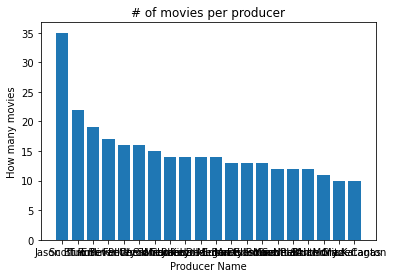

In [162]:
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_xlabel('Producer Name')
ax.set_ylabel('How many movies')
ax.set_title('# of movies per producer')

In [184]:
x_mean = producer_mean_rating['averagerating'].index[:20]
x_mean

Index(['Erin Leyden', 'Tamara Rosenberg', 'Deirdre Fenton', 'Libby Geist',
       'Nina Krstic', 'Lynda Obst', 'Siddharth Roy Kapur',
       'Kalpathi S. Ganesh', 'Nicolas Duval Adassovsky', 'Kalpathi S. Agoram',
       'Kalpathi S. Suresh', 'Christopher Miller', 'Laurent Zeitoun',
       'Yann Zenou', 'Avi Arad', 'Emma Thomas', 'Nicholas Ma', 'Clare Olssen',
       'Katsuhiro Takei', 'Kôichirô Itô'],
      dtype='object', name='primary_name')

In [186]:
y_mean = producer_mean_rating['averagerating'].values[:20]
y_mean

array([8.9       , 8.9       , 8.9       , 8.9       , 8.9       ,
       8.6       , 8.5       , 8.5       , 8.5       , 8.5       ,
       8.5       , 8.5       , 8.5       , 8.5       , 8.5       ,
       8.43333333, 8.4       , 8.4       , 8.4       , 8.4       ])

<BarContainer object of 20 artists>

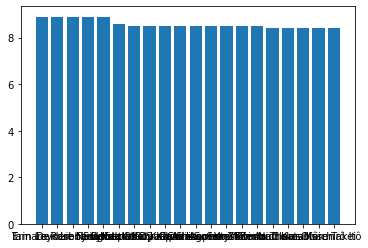

In [187]:
fig, ax = plt.subplots()
ax.bar(x_mean, y_mean)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(producer_mean_rating['averagerating'])

In [ ]:
#high_rating_producers = imdb_df_people_df[imdb_df_people_df_df['averagerating'] == ]

scatter between values 

In [189]:
x = composer_df['primary_name'].value_counts()
x

Jason Blum              66
David Michael Latt      61
Warren Croyle           50
Stan Spry               35
Eric Scott Woods        30
                        ..
Michael Katz             1
John Gregory Willard     1
Alex Cohen               1
Howie Lang               1
Beñat Ibarbia            1
Name: primary_name, Length: 28279, dtype: int64

In [118]:
y = composer_df['primary_name'].value_counts().index
y

Index(['Jason Blum', 'David Michael Latt', 'Warren Croyle', 'Stan Spry',
       'Eric Scott Woods', 'David S. Sterling', 'Phillip B. Goldfine',
       'Randall Emmett', 'Scott Rudin', 'Vince Jolivette',
       ...
       'Pedro Davila', 'Heather DeVan', 'Len Sherman', 'Ben Nedivi',
       'Edwin Kinji Ushiro', 'Michael Katz', 'John Gregory Willard',
       'Alex Cohen', 'Howie Lang', 'Beñat Ibarbia'],
      dtype='object', length=28279)

In [ ]:
fig, ax = plt.subplots()
ax.barh(x, y)

In [54]:
fig, ax = plt.subplots()
ax.scatter(tmdb_movies['vote_count'], tmdb_movies['vote_average'], alpha=.3)


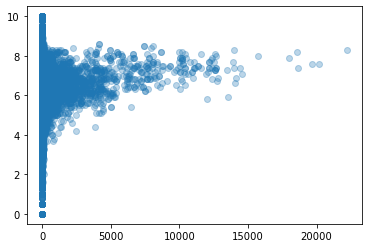

In [56]:
fig, ax = plt.subplots()
ax.scatter(tmdb_movies['vote_count'], tmdb_movies['vote_average'], alpha=.3)

In [296]:
#tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
#tmdb_movies['release_date']

In [294]:
#tmdb_movies.sort_values(by='release_date')

In [292]:
#tmdb_movies_years = tmdb_movies[tmdb_movies['release_date'] >= '1980-01-01']
#tmdb_movies_years.sort_values(by='release_date')

In [293]:
#fig, ax = plt.subplots()
#ax.plot(tmdb_movies['release_date'], tmdb_movies['popularity'])

see correlation between $$ spent and return - scatter

In [195]:
tnumbers_db_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz', index_col=0)
tnumbers_db_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [193]:
imdb_df

,tconst,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
8298,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0
13595,tt0816692,14,Interstellar,US,NaN,NaN,NaN,0.0,8.6,1299334.0
47379,tt1853728,11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0,8.4,1211405.0
81128,tt0848228,39,Marvel's The Avengers,US,NaN,NaN,complete title,0.0,8.1,1183655.0
94472,tt0993846,12,The Wolf of Wall Street,US,NaN,imdbDisplay,NaN,0.0,8.2,1035358.0
...,...,...,...,...,...,...,...,...,...,...
331539,tt7385718,1,Conway Pride,US,NaN,NaN,NaN,0.0,NaN,NaN
331574,tt8855960,1,Straight Up,US,NaN,NaN,NaN,0.0,NaN,NaN
331582,tt8901666,1,The Journey Ahead,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0,NaN,NaN


In [196]:
tnumbers_db_df.rename(columns = {'movie': 'title'}, inplace=True)
tnumbers_db_df

,release_date,title,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [202]:
joined_imdb_tndb = pd.merge(imdb_df_people_df, tnumbers_db_df, on='title', how='inner')
joined_imdb_tndb

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,known_for_titles,release_date,production_budget,domestic_gross,worldwide_gross
0,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,7.0,nm0001877,composer,Hans Zimmer,"tt0172495,tt0988045,tt5013056,tt1375666","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
1,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,4.0,nm0913822,actor,Ken Watanabe,"tt0831387,tt1375666,tt2109248,tt0325710","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,8.0,nm0002892,cinematographer,Wally Pfister,"tt1375666,tt0468569,tt0482571,tt0372784","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,1.0,nm0000138,actor,Leonardo DiCaprio,"tt0407887,tt0120338,tt0993846,tt1375666","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
4,tt1375666,8,Inception,US,en,NaN,NaN,0.0,8.8,1841066.0,3.0,nm0680983,actress,Ellen Page,"tt0424136,tt1375666,tt0467406,tt1877832","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19323,tt6863362,1,Brainstorm,US,NaN,NaN,NaN,0.0,NaN,NaN,5.0,nm4178065,self,Kate Renner,"tt1315027,tt1560555,tt0462125,tt8220360","Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"
19324,tt6863362,1,Brainstorm,US,NaN,NaN,NaN,0.0,NaN,NaN,6.0,nm8975910,actor,Dr. Brien Smith,tt6863362,"Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"
19325,tt6863362,1,Brainstorm,US,NaN,NaN,NaN,0.0,NaN,NaN,7.0,nm8975911,actress,Dr. Patricia Penovich,tt6863362,"Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"
19326,tt6863362,1,Brainstorm,US,NaN,NaN,NaN,0.0,NaN,NaN,8.0,nm8975912,self,Rebecca Kill,tt6863362,"Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"


In [203]:
joined_imdb_tndb.drop('types', axis=1, inplace=True)

In [204]:
joined_imdb_tndb.drop('attributes', axis=1, inplace=True)

In [205]:
joined_imdb_tndb.drop('ordering_x', axis=1, inplace=True)

In [206]:
joined_imdb_tndb

,tconst,title,region,language,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,known_for_titles,release_date,production_budget,domestic_gross,worldwide_gross
0,tt1375666,Inception,US,en,0.0,8.8,1841066.0,7.0,nm0001877,composer,Hans Zimmer,"tt0172495,tt0988045,tt5013056,tt1375666","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
1,tt1375666,Inception,US,en,0.0,8.8,1841066.0,4.0,nm0913822,actor,Ken Watanabe,"tt0831387,tt1375666,tt2109248,tt0325710","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,tt1375666,Inception,US,en,0.0,8.8,1841066.0,8.0,nm0002892,cinematographer,Wally Pfister,"tt1375666,tt0468569,tt0482571,tt0372784","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
3,tt1375666,Inception,US,en,0.0,8.8,1841066.0,1.0,nm0000138,actor,Leonardo DiCaprio,"tt0407887,tt0120338,tt0993846,tt1375666","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
4,tt1375666,Inception,US,en,0.0,8.8,1841066.0,3.0,nm0680983,actress,Ellen Page,"tt0424136,tt1375666,tt0467406,tt1877832","Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19323,tt6863362,Brainstorm,US,NaN,0.0,NaN,NaN,5.0,nm4178065,self,Kate Renner,"tt1315027,tt1560555,tt0462125,tt8220360","Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"
19324,tt6863362,Brainstorm,US,NaN,0.0,NaN,NaN,6.0,nm8975910,actor,Dr. Brien Smith,tt6863362,"Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"
19325,tt6863362,Brainstorm,US,NaN,0.0,NaN,NaN,7.0,nm8975911,actress,Dr. Patricia Penovich,tt6863362,"Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"
19326,tt6863362,Brainstorm,US,NaN,0.0,NaN,NaN,8.0,nm8975912,self,Rebecca Kill,tt6863362,"Sep 30, 1983","$15,000,000","$8,921,050","$8,921,050"


In [ ]:
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',','')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$','')
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(float)

In [217]:
joined_imdb_tndb['production_budget'] = joined_imdb_tndb['production_budget'].str.replace(',','')
joined_imdb_tndb['production_budget'] = joined_imdb_tndb['production_budget'].str.replace('$','')
joined_imdb_tndb['production_budget'] = joined_imdb_tndb['production_budget'].astype(float)

In [218]:
joined_imdb_tndb['domestic_gross'] = joined_imdb_tndb['domestic_gross'].str.replace(',','')
joined_imdb_tndb['domestic_gross'] = joined_imdb_tndb['domestic_gross'].str.replace('$','')
joined_imdb_tndb['domestic_gross'] = joined_imdb_tndb['domestic_gross'].astype(float)

In [219]:
joined_imdb_tndb['worldwide_gross'] = joined_imdb_tndb['worldwide_gross'].str.replace(',','')
joined_imdb_tndb['worldwide_gross'] = joined_imdb_tndb['worldwide_gross'].str.replace('$','')
joined_imdb_tndb['worldwide_gross'] = joined_imdb_tndb['worldwide_gross'].astype(float)

In [220]:
joined_imdb_tndb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19328 entries, 0 to 19327
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             19328 non-null  object 
 1   title              19328 non-null  object 
 2   region             19328 non-null  object 
 3   language           433 non-null    object 
 4   is_original_title  19328 non-null  float64
 5   averagerating      17360 non-null  float64
 6   numvotes           17360 non-null  float64
 7   ordering_y         19322 non-null  float64
 8   nconst             19322 non-null  object 
 9   category           19322 non-null  object 
 10  primary_name       19322 non-null  object 
 11  known_for_titles   19289 non-null  object 
 12  release_date       19328 non-null  object 
 13  production_budget  19328 non-null  float64
 14  domestic_gross     19328 non-null  float64
 15  worldwide_gross    19328 non-null  float64
dtypes: float64(7), object(

In [250]:
joined_imdb_tndb['gross_budget_ratio'] = joined_imdb_tndb['production_budget'] / joined_imdb_tndb['worldwide_gross']
joined_imdb_tndb['gross_budget_ratio']

0        0.191496
1        0.191496
2        0.191496
3        0.191496
4        0.191496
           ...   
19323    1.681416
19324    1.681416
19325    1.681416
19326    1.681416
19327    1.681416
Name: gross_budget_ratio, Length: 19328, dtype: float64

In [251]:
joined_director_df = joined_imdb_tndb[joined_imdb_tndb['category'] == 'director']

In [252]:
joined_director_df

,tconst,title,region,language,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,known_for_titles,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
6,tt1375666,Inception,US,en,0.0,8.8,1841066.0,5.0,nm0634240,director,Christopher Nolan,"tt0482571,tt1375666,tt5013056,tt0154506","Jul 16, 2010",160000000.0,292576195.0,835524642.0,0.191496
15,tt0816692,Interstellar,US,NaN,0.0,8.6,1299334.0,5.0,nm0634240,director,Christopher Nolan,"tt0482571,tt1375666,tt5013056,tt0154506","Nov 5, 2014",165000000.0,188017894.0,666379375.0,0.247607
27,tt1853728,Django Unchained,US,NaN,0.0,8.4,1211405.0,5.0,nm0000233,director,Quentin Tarantino,"tt3460252,tt0116367,tt0110912,tt0105236","Dec 25, 2012",100000000.0,162805434.0,449948323.0,0.222248
34,tt0993846,The Wolf of Wall Street,US,NaN,0.0,8.2,1035358.0,5.0,nm0000217,director,Martin Scorsese,"tt0490215,tt0075314,tt0099685,tt0070379","Dec 25, 2013",100000000.0,116900694.0,389870414.0,0.256495
40,tt1130884,Shutter Island,US,NaN,0.0,8.1,1005960.0,5.0,nm0000217,director,Martin Scorsese,"tt0490215,tt0075314,tt0099685,tt0070379","Feb 19, 2010",80000000.0,128012934.0,299461782.0,0.267146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19286,tt4126626,Annie Get Your Gun,US,NaN,0.0,NaN,NaN,4.0,nm2696174,director,Corey Harrell,"tt6843678,tt5651214,tt6057924,tt4111814","May 17, 1950",3768785.0,8000000.0,8000000.0,0.471098
19290,tt6010330,Destiny,US,NaN,0.0,NaN,NaN,5.0,nm3339324,director,John Pocino,"tt2040334,tt4111998,tt1382568,tt6010330","Dec 31, 2014",750000.0,0.0,450.0,1666.666667
19297,tt8364368,Crawl,US,NaN,0.0,NaN,NaN,5.0,nm0014960,director,Alexandre Aja,"tt2103217,tt0338095,tt0464154,tt0454841","Jul 12, 2019",17000000.0,0.0,0.0,inf
19312,tt5531336,Proof,US,NaN,0.0,NaN,NaN,5.0,nm7981487,director,Carl Walins,tt5531336,"Sep 16, 2005",20000000.0,7535331.0,8284331.0,2.414196


In [228]:
joined_director_df.sort_values(by='averagerating', ascending=False)

,tconst,title,region,language,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,known_for_titles,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
11203,tt1455256,The Wall,US,NaN,0.0,9.2,8.0,1.0,nm3198076,director,Ricardo Martinez,"tt0445870,tt0411040,tt1455256,tt2417970","May 12, 2017",3000000.0,1803064.0,4495262.0,1.498421
17181,tt3060772,Dragonfly,US,NaN,0.0,9.0,5.0,5.0,nm5806934,director,Sam Campos,"tt3060772,tt6350786,tt6042400,tt6051984","Feb 22, 2002",60000000.0,30063805.0,30063805.0,0.501063
14533,tt1795369,Frankenstein,US,NaN,0.0,9.0,1832.0,5.0,nm0000965,director,Danny Boyle,"tt1542344,tt0289043,tt1010048,tt0111149","Nov 4, 1994",45000000.0,22006296.0,112006296.0,2.489029
18249,tt1934226,Dark Blue,US,NaN,0.0,8.9,9.0,5.0,nm4180293,director,David C. Kirtland,"tt2189514,tt1934226,tt4547582,tt5287560","Feb 21, 2003",15000000.0,9237470.0,12262065.0,0.817471
16661,tt3776292,Stuck,US,NaN,0.0,8.8,5.0,5.0,nm1835627,director,John Painz,"tt3790660,tt3195790,tt5180056,tt3776292","May 30, 2008",5000000.0,67505.0,67505.0,0.013501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19286,tt4126626,Annie Get Your Gun,US,NaN,0.0,NaN,NaN,4.0,nm2696174,director,Corey Harrell,"tt6843678,tt5651214,tt6057924,tt4111814","May 17, 1950",3768785.0,8000000.0,8000000.0,2.122700
19290,tt6010330,Destiny,US,NaN,0.0,NaN,NaN,5.0,nm3339324,director,John Pocino,"tt2040334,tt4111998,tt1382568,tt6010330","Dec 31, 2014",750000.0,0.0,450.0,0.000600
19297,tt8364368,Crawl,US,NaN,0.0,NaN,NaN,5.0,nm0014960,director,Alexandre Aja,"tt2103217,tt0338095,tt0464154,tt0454841","Jul 12, 2019",17000000.0,0.0,0.0,0.000000
19312,tt5531336,Proof,US,NaN,0.0,NaN,NaN,5.0,nm7981487,director,Carl Walins,tt5531336,"Sep 16, 2005",20000000.0,7535331.0,8284331.0,0.414217


In [244]:
joined_director_df.isna().sum()

tconst                   0
title                    0
region                   0
language              2107
is_original_title        0
averagerating          291
numvotes               291
ordering_y               0
nconst                   0
category                 0
primary_name             0
known_for_titles         0
release_date             0
production_budget        0
domestic_gross           0
worldwide_gross          0
gross_budget_ratio       0
dtype: int64

In [245]:
cleaned_joined_director_df = joined_director_df.dropna(subset=['averagerating'])
cleaned_joined_director_df.isna().sum()

tconst                   0
title                    0
region                   0
language              1818
is_original_title        0
averagerating            0
numvotes                 0
ordering_y               0
nconst                   0
category                 0
primary_name             0
known_for_titles         0
release_date             0
production_budget        0
domestic_gross           0
worldwide_gross          0
gross_budget_ratio       0
dtype: int64

In [285]:
cleaned_joined_director_df

,tconst,title,region,language,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,known_for_titles,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
6,tt1375666,Inception,US,en,0.0,8.8,1841066.0,5.0,nm0634240,director,Christopher Nolan,"tt0482571,tt1375666,tt5013056,tt0154506","Jul 16, 2010",160000000.0,292576195.0,835524642.0,5.222029
15,tt0816692,Interstellar,US,NaN,0.0,8.6,1299334.0,5.0,nm0634240,director,Christopher Nolan,"tt0482571,tt1375666,tt5013056,tt0154506","Nov 5, 2014",165000000.0,188017894.0,666379375.0,4.038663
27,tt1853728,Django Unchained,US,NaN,0.0,8.4,1211405.0,5.0,nm0000233,director,Quentin Tarantino,"tt3460252,tt0116367,tt0110912,tt0105236","Dec 25, 2012",100000000.0,162805434.0,449948323.0,4.499483
34,tt0993846,The Wolf of Wall Street,US,NaN,0.0,8.2,1035358.0,5.0,nm0000217,director,Martin Scorsese,"tt0490215,tt0075314,tt0099685,tt0070379","Dec 25, 2013",100000000.0,116900694.0,389870414.0,3.898704
40,tt1130884,Shutter Island,US,NaN,0.0,8.1,1005960.0,5.0,nm0000217,director,Martin Scorsese,"tt0490215,tt0075314,tt0099685,tt0070379","Feb 19, 2010",80000000.0,128012934.0,299461782.0,3.743272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,tt1821549,Nebraska,US,NaN,0.0,7.7,105304.0,5.0,nm0668247,director,Alexander Payne,"tt0126886,tt1033575,tt0375063,tt1821549","Nov 15, 2013",12000000.0,17654912.0,24761360.0,2.063447
5201,tt1547234,Premium Rush,US,NaN,0.0,6.5,105279.0,5.0,nm0462895,director,David Koepp,"tt0145487,tt0117060,tt0164181,tt0107290","Aug 24, 2012",35000000.0,20275446.0,31393201.0,0.896949
5216,tt0365907,A Walk Among the Tombstones,US,NaN,0.0,6.5,105116.0,5.0,nm0291082,director,Scott Frank,"tt0181689,tt0120780,tt3315342,tt0427470","Sep 19, 2014",28000000.0,26017685.0,62108587.0,2.218164
5223,tt2884206,I Origins,US,NaN,0.0,7.4,104718.0,5.0,nm2648685,director,Mike Cahill,"tt1748207,tt5639944,tt1549572,tt2884206","Jul 18, 2014",1000000.0,336472.0,852399.0,0.852399


In [249]:
cleaned_joined_director_df['worldwide_gross'].value_counts()

0.0            199
5953886.0        5
487519809.0      5
3496.0           5
172867.0         5
              ... 
68310140.0       1
41495213.0       1
2602.0           1
26121638.0       1
529530715.0      1
Name: worldwide_gross, Length: 1406, dtype: int64

In [288]:
cleaned_joined_director_df.loc[cleaned_joined_director_df['primary_name'] == 'Nitesh Tiwari']

,tconst,title,region,language,is_original_title,averagerating,numvotes,ordering_y,nconst,category,primary_name,known_for_titles,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
4536,tt5074352,Dangal,US,NaN,0.0,8.5,123638.0,5.0,nm4318159,director,Nitesh Tiwari,"tt6967980,tt1841542,tt3531852,tt5074352","Dec 21, 2016",9500000.0,12391761.0,294654618.0,31.016276


In [253]:
cleaned_joined_director_df = cleaned_joined_director_df[cleaned_joined_director_df['worldwide_gross'] > 0]

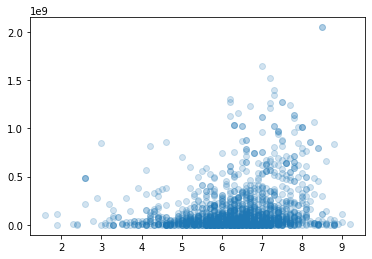

In [275]:
fig, ax = plt.subplots()
ax.scatter(cleaned_joined_director_df['averagerating'], cleaned_joined_director_df['worldwide_gross'], alpha=.2)


In [257]:
cleaned_joined_director_df.corr()

,is_original_title,averagerating,numvotes,ordering_y,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
is_original_title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
averagerating,NaN,1.000000,0.418748,-0.067519,0.151546,0.229904,0.218226,-0.044311
numvotes,NaN,0.418748,1.000000,0.085908,0.517249,0.605990,0.597084,0.022848
ordering_y,NaN,-0.067519,0.085908,1.000000,0.078201,0.090324,0.103389,0.001078
production_budget,NaN,0.151546,0.517249,0.078201,1.000000,0.720626,0.783647,-0.071242
domestic_gross,NaN,0.229904,0.605990,0.090324,0.720626,1.000000,0.948508,0.052831
worldwide_gross,NaN,0.218226,0.597084,0.103389,0.783647,0.948508,1.000000,0.041967
gross_budget_ratio,NaN,-0.044311,0.022848,0.001078,-0.071242,0.052831,0.041967,1.000000


In the plot below, we can see that there's a slightly positive correlation between average rating and worldwide gross. We can also observe that many low budget

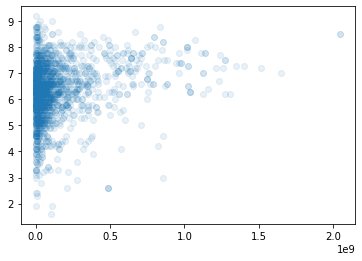

In [268]:

fig, ax = plt.subplots()
ax.scatter(cleaned_joined_director_df['worldwide_gross'], cleaned_joined_director_df['averagerating'], alpha=.1)


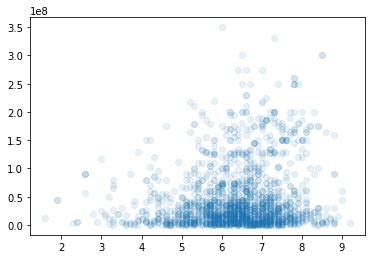

In [270]:

fig, ax = plt.subplots()
ax.scatter(cleaned_joined_director_df['averagerating'], cleaned_joined_director_df['production_budget'], alpha=.1)


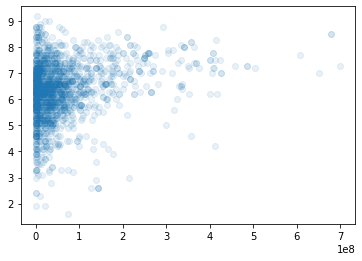

In [267]:
fig, ax = plt.subplots()
ax.scatter(cleaned_joined_director_df['domestic_gross'], cleaned_joined_director_df['averagerating'], alpha=.1)

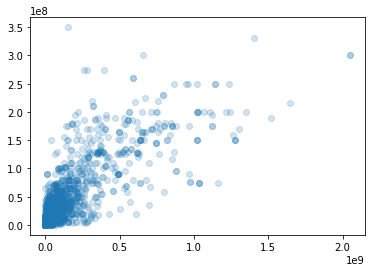

In [274]:
fig, ax = plt.subplots()
ax.scatter(cleaned_joined_director_df['worldwide_gross'], cleaned_joined_director_df['production_budget'], alpha=.2)

In [279]:
cleaned_joined_director_df = cleaned_joined_director_df[cleaned_joined_director_df['numvotes'] >= cleaned_joined_director_df['numvotes'].mean()]

In [281]:
cleaned_joined_director_df_mean = cleaned_joined_director_df.groupby('primary_name').mean()

In [284]:
cleaned_joined_director_df_mean.sort_values(by='averagerating', ascending=False)

,is_original_title,averagerating,numvotes,ordering_y,production_budget,domestic_gross,worldwide_gross,gross_budget_ratio
primary_name,,,,,,,,
Nitesh Tiwari,0.0,8.500000,1.236380e+05,5.0,9.500000e+06,1.239176e+07,2.946546e+08,31.016276
Christopher Nolan,0.0,8.433333,1.202327e+06,5.0,1.583333e+08,2.235541e+08,6.672471e+08,4.197647
Adrian Molina,0.0,8.400000,2.771940e+05,5.0,1.750000e+08,2.097260e+08,7.980081e+08,4.560046
Lee Unkrich,0.0,8.350000,4.797060e+05,5.5,1.875000e+08,3.123654e+08,9.334438e+08,4.952222
Pete Docter,0.0,8.200000,5.361810e+05,5.0,1.750000e+08,3.564617e+08,8.542360e+08,4.881349
...,...,...,...,...,...,...,...,...
John Moore,0.0,5.300000,1.883830e+05,5.0,9.200000e+07,6.734920e+07,3.042492e+08,3.307056
Harmony Korine,0.0,5.300000,1.265040e+05,5.0,5.000000e+06,1.412429e+07,3.114925e+07,6.229850
Josh Trank,0.0,5.233333,1.698513e+05,5.0,7.316667e+07,9.179627e+07,2.082212e+08,5.170930


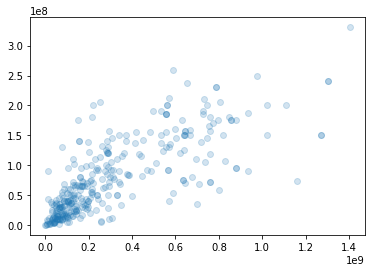

In [290]:
fig, ax = plt.subplots()
ax.scatter(cleaned_joined_director_df_mean['worldwide_gross'], cleaned_joined_director_df_mean['production_budget'], alpha=.2)

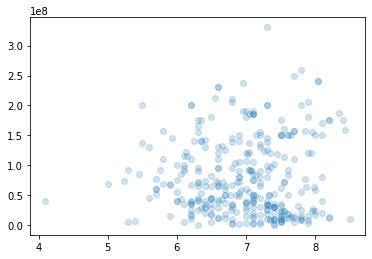

In [291]:
fig, ax = plt.subplots()
ax.scatter(cleaned_joined_director_df_mean['averagerating'], cleaned_joined_director_df_mean['production_budget'], alpha=.2)